In [2]:
card_map = {
    26000000: "Knight",
    26000001: "Archers",
    26000002: "Goblins",
    26000003: "Giant",
    26000004: "P.E.K.K.A",
    26000005: "Minions",
    26000006: "Balloon",
    26000007: "Witch",
    26000008: "Barbarians",
    26000009: "Golem",
    26000010: "Skeletons",
    26000011: "Valkyrie",
    26000012: "Skeleton Army",
    26000013: "Bomber",
    26000014: "Musketeer",
    26000015: "Baby Dragon",
    26000016: "Prince",
    26000017: "Wizard",
    26000018: "Mini P.E.K.K.A",
    26000019: "Spear Goblins",
    26000020: "Giant Skeleton",
    26000021: "Hog Rider",
    26000022: "Minion Horde",
    26000023: "Ice Wizard",
    26000024: "Royal Giant",
    26000025: "Guards",
    26000026: "Princess",
    26000027: "Dark Prince",
    26000028: "Three Musketeers",
    26000029: "Lava Hound",
    26000030: "Ice Spirit",
    26000031: "Fire Spirit",
    26000032: "Miner",
    26000033: "Sparky",
    26000034: "Bowler",
    26000035: "Lumberjack",
    26000036: "Battle Ram",
    26000037: "Inferno Dragon",
    26000038: "Ice Golem",
    26000039: "Mega Minion",
    26000040: "Dart Goblin",
    26000041: "Goblin Gang",
    26000042: "Electro Wizard",
    26000043: "Elite Barbarians",
    26000044: "Hunter",
    26000045: "Executioner",
    26000046: "Bandit",
    26000047: "Royal Recruits",
    26000048: "Night Witch",
    26000049: "Bats",
    26000050: "Royal Ghost",
    26000051: "Ram Rider",
    26000052: "Zappies",
    26000053: "Rascals",
    26000054: "Cannon Cart",
    26000055: "Mega Knight",
    26000056: "Skeleton Barrel",
    26000057: "Flying Machine",
    26000058: "Wall Breakers",
    26000059: "Royal Hogs",
    26000060: "Goblin Giant",
    26000061: "Fisherman",
    26000062: "Magic Archer",
    26000063: "Electro Dragon",
    26000064: "Firecracker",
    26000065: "Mighty Miner",
    26000067: "Elixir Golem",
    26000068: "Battle Healer",
    26000069: "Skeleton King",
    26000072: "Archer Queen",
    26000074: "Golden Knight",
    26000077: "Monk",
    26000080: "Skeleton Dragons",
    26000083: "Mother Witch",
    26000084: "Electro Spirit",
    26000085: "Electro Giant",
    26000087: "Phoenix",
    26000093: "Little Prince",
    26000095: "Goblin Demolisher",
    26000096: "Goblin Machine",
    26000097: "Suspicious Bush",
    26000099: "Goblinstein",
    26000101: "Rune Giant",
    26000102: "Berserker",
    26000103: "Boss Bandit",
    27000000: "Cannon",
    27000001: "Goblin Hut",
    27000002: "Mortar",
    27000003: "Inferno Tower",
    27000004: "Bomb Tower",
    27000005: "Barbarian Hut",
    27000006: "Tesla",
    27000007: "Elixir Collector",
    27000008: "X-Bow",
    27000009: "Tombstone",
    27000010: "Furnace",
    27000012: "Goblin Cage",
    27000013: "Goblin Drill",
    28000000: "Fireball",
    28000001: "Arrows",
    28000002: "Rage",
    28000003: "Rocket",
    28000004: "Goblin Barrel",
    28000005: "Freeze",
    28000006: "Mirror",
    28000007: "Lightning",
    28000008: "Zap",
    28000009: "Poison",
    28000010: "Graveyard",
    28000011: "The Log",
    28000012: "Tornado",
    28000013: "Clone",
    28000014: "Earthquake",
    28000015: "Barbarian Barrel",
    28000016: "Heal Spirit",
    28000017: "Giant Snowball",
    28000018: "Royal Delivery",
    28000023: "Void",
    28000024: "Goblin Curse",
    28000025: "Spirit Empress",
    28000026: "Vines",
    159000000: "Tower Princess",
    159000001: "Cannoneer",
    159000002: "Dagger Duchess",
    159000004: "Royal Chef"
}

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv("battlesStaging_12282020_WL_tagged.csv")

print("All Columns")
for col in df.columns:
    print(col)


All Columns
Unnamed: 0
battleTime
arena.id
gameMode.id
average.startingTrophies
winner.tag
winner.startingTrophies
winner.trophyChange
winner.crowns
winner.kingTowerHitPoints
winner.princessTowersHitPoints
winner.clan.tag
winner.clan.badgeId
loser.tag
loser.startingTrophies
loser.trophyChange
loser.crowns
loser.kingTowerHitPoints
loser.clan.tag
loser.clan.badgeId
loser.princessTowersHitPoints
tournamentTag
winner.card1.id
winner.card1.level
winner.card2.id
winner.card2.level
winner.card3.id
winner.card3.level
winner.card4.id
winner.card4.level
winner.card5.id
winner.card5.level
winner.card6.id
winner.card6.level
winner.card7.id
winner.card7.level
winner.card8.id
winner.card8.level
winner.cards.list
winner.totalcard.level
winner.troop.count
winner.structure.count
winner.spell.count
winner.common.count
winner.rare.count
winner.epic.count
winner.legendary.count
winner.elixir.average
loser.card1.id
loser.card1.level
loser.card2.id
loser.card2.level
loser.card3.id
loser.card3.level
loser.ca

Clean unneeded columns

In [5]:
df = df.drop(columns=['battleTime', 'winner.tag', 'winner.crowns', 
                      'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 
                      'loser.crowns', 'loser.clan.tag', 'loser.clan.badgeId',
                      'tournamentTag', 'winner.common.count', 'winner.rare.count',
                      'winner.epic.count', 'winner.legendary.count', 'loser.common.count',
                      'loser.rare.count', 'loser.epic.count', 'loser.legendary.count',
                      'winner.trophyChange', 'loser.trophyChange'])

for col in df.columns:
    print(col)

Unnamed: 0
arena.id
gameMode.id
average.startingTrophies
winner.startingTrophies
winner.kingTowerHitPoints
winner.princessTowersHitPoints
loser.startingTrophies
loser.kingTowerHitPoints
loser.princessTowersHitPoints
winner.card1.id
winner.card1.level
winner.card2.id
winner.card2.level
winner.card3.id
winner.card3.level
winner.card4.id
winner.card4.level
winner.card5.id
winner.card5.level
winner.card6.id
winner.card6.level
winner.card7.id
winner.card7.level
winner.card8.id
winner.card8.level
winner.cards.list
winner.totalcard.level
winner.troop.count
winner.structure.count
winner.spell.count
winner.elixir.average
loser.card1.id
loser.card1.level
loser.card2.id
loser.card2.level
loser.card3.id
loser.card3.level
loser.card4.id
loser.card4.level
loser.card5.id
loser.card5.level
loser.card6.id
loser.card6.level
loser.card7.id
loser.card7.level
loser.card8.id
loser.card8.level
loser.cards.list
loser.totalcard.level
loser.troop.count
loser.structure.count
loser.spell.count
loser.elixir.averag

In [6]:
## remove level costs because we don't need that. only the total for average elixer.
df.drop(columns=['winner.card1.level', 'winner.card2.level', 'winner.card3.level', 'winner.card4.level', 'winner.card5.level', 'winner.card6.level', 'winner.card7.level', 'winner.card8.level', 
                 'loser.card1.level', 'loser.card2.level', 'loser.card3.level', 'loser.card4.level', 'loser.card5.level', 'loser.card6.level', 'loser.card7.level', 'loser.card8.level'])

,Unnamed: 0,arena.id,gameMode.id,average.startingTrophies,winner.startingTrophies,winner.kingTowerHitPoints,winner.princessTowersHitPoints,loser.startingTrophies,loser.kingTowerHitPoints,loser.princessTowersHitPoints,...,loser.card5.id,loser.card6.id,loser.card7.id,loser.card8.id,loser.cards.list,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.elixir.average
0,0,54000050.0,72000044.0,5962.0,5952.0,5832.0,"[3668, 765]",5972.0,5832.0,[3668],...,26000009,26000048,26000039,28000012,"[26000009, 26000015, 26000039, 26000048, 26000...",104,6,0,2,4.250000
1,1,54000050.0,72000044.0,6528.0,6532.0,5762.0,"[3668, 1488]",6524.0,5397.0,[3668],...,26000035,26000013,28000012,28000000,"[26000009, 26000013, 26000015, 26000023, 26000...",104,6,0,2,4.125000
2,2,54000050.0,72000044.0,5968.0,5985.0,5832.0,"[859, 87]",5951.0,NaN,NaN,...,28000002,26000012,28000001,26000022,"[26000006, 26000011, 26000012, 26000017, 26000...",104,6,0,2,3.875000
3,3,54000050.0,72000044.0,5222.0,5222.0,5832.0,"[1124, 3404]",5222.0,5832.0,[3539],...,26000011,28000006,26000014,28000011,"[26000010, 26000011, 26000014, 27000006, 28000...",104,3,1,4,3.267857
4,4,54000050.0,72000044.0,6760.0,6759.0,2825.0,"[2988, 591]",6761.0,5832.0,[2092],...,28000007,26000039,28000012,26000013,"[26000009, 26000013, 26000015, 26000035, 26000...",104,6,0,2,4.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902761,1902761,54000050.0,72000006.0,4059.0,4060.0,3768.0,"[1680, 1020]",4058.0,3448.0,[2352],...,26000046,28000000,28000011,26000017,"[26000004, 26000007, 26000012, 26000017, 26000...",64,6,0,2,4.000000
1902762,1902762,54000050.0,72000006.0,4415.5,4421.0,5304.0,"[1358, 2482]",4410.0,4824.0,[3052],...,26000040,26000022,26000009,26000011,"[26000000, 26000009, 26000011, 26000017, 26000...",91,7,1,0,4.500000
1902763,1902763,54000050.0,72000006.0,4435.0,4432.0,4824.0,"[306, 1029]",4438.0,5304.0,[3346],...,28000000,28000002,26000006,28000006,"[26000006, 26000009, 26000012, 26000028, 26000...",92,5,0,3,5.125000
1902764,1902764,54000024.0,72000006.0,3453.0,3462.0,3528.0,"[672, 2184]",3444.0,3224.0,[1103],...,28000011,26000004,26000012,26000017,"[26000004, 26000007, 26000012, 26000015, 26000...",63,5,0,3,3.875000


In [7]:
# Combine winner's cards
winner_cols = [f"winner.card{i}.id" for i in range(1, 9)]
df["winner_deck"] = df[winner_cols].values.tolist()

# Combine loser's cards
loser_cols = [f"loser.card{i}.id" for i in range(1, 9)]
df["loser_deck"] = df[loser_cols].values.tolist()

In [8]:
print("Winner and Loser decks")

print(df[["winner_deck", "loser_deck"]].head())

Winner and Loser decks
                                         winner_deck  \
0  [26000009, 26000042, 28000007, 26000013, 26000...   
1  [26000000, 27000003, 28000004, 26000041, 28000...   
2  [28000016, 28000014, 26000080, 26000063, 26000...   
3  [26000030, 26000038, 26000001, 28000000, 27000...   
4  [28000015, 26000015, 26000010, 26000061, 26000...   

                                          loser_deck  
0  [26000015, 28000015, 26000054, 26000063, 26000...  
1  [26000009, 26000048, 26000023, 26000015, 26000...  
2  [26000018, 26000011, 26000017, 26000006, 28000...  
3  [28000004, 27000006, 28000009, 26000010, 26000...  
4  [26000009, 26000048, 26000035, 26000015, 28000...  


In [9]:
def translate_deck(deck):
    # Convert each ID to its name, handling missing values
    return [card_map.get(card_id, str(card_id)) for card_id in deck if pd.notna(card_id)]

df["winner_deck_names"] = df["winner_deck"].apply(translate_deck)
df["loser_deck_names"]  = df["loser_deck"].apply(translate_deck)

In [10]:
for col in df.columns:
    print(col)

Unnamed: 0
arena.id
gameMode.id
average.startingTrophies
winner.startingTrophies
winner.kingTowerHitPoints
winner.princessTowersHitPoints
loser.startingTrophies
loser.kingTowerHitPoints
loser.princessTowersHitPoints
winner.card1.id
winner.card1.level
winner.card2.id
winner.card2.level
winner.card3.id
winner.card3.level
winner.card4.id
winner.card4.level
winner.card5.id
winner.card5.level
winner.card6.id
winner.card6.level
winner.card7.id
winner.card7.level
winner.card8.id
winner.card8.level
winner.cards.list
winner.totalcard.level
winner.troop.count
winner.structure.count
winner.spell.count
winner.elixir.average
loser.card1.id
loser.card1.level
loser.card2.id
loser.card2.level
loser.card3.id
loser.card3.level
loser.card4.id
loser.card4.level
loser.card5.id
loser.card5.level
loser.card6.id
loser.card6.level
loser.card7.id
loser.card7.level
loser.card8.id
loser.card8.level
loser.cards.list
loser.totalcard.level
loser.troop.count
loser.structure.count
loser.spell.count
loser.elixir.averag

In [11]:
## print out decks with names
print(df[["winner_deck_names", "loser_deck_names"]].head())

                                   winner_deck_names  \
0  [Golem, Electro Wizard, Lightning, Bomber, Nig...   
1  [Knight, Inferno Tower, Goblin Barrel, Goblin ...   
2  [Heal Spirit, Earthquake, Skeleton Dragons, El...   
3  [Ice Spirit, Ice Golem, Archers, Fireball, Tes...   
4  [Barbarian Barrel, Baby Dragon, Skeletons, Fis...   

                                    loser_deck_names  
0  [Baby Dragon, Barbarian Barrel, Cannon Cart, E...  
1  [Golem, Night Witch, Ice Wizard, Baby Dragon, ...  
2  [Mini P.E.K.K.A, Valkyrie, Wizard, Balloon, Ra...  
3  [Goblin Barrel, Tesla, Poison, Skeletons, Valk...  
4  [Golem, Night Witch, Lumberjack, Baby Dragon, ...  


In [12]:
## remove uneeded columns
df = df.drop(columns=['winner.card1.id', 'winner.card2.id', 'winner.card3.id', 'winner.card4.id', 'winner.card5.id', 'winner.card6.id', 'winner.card7.id', 'winner.card8.id', 
                      'winner.card1.level', 'winner.card2.level', 'winner.card3.level', 'winner.card4.level', 'winner.card5.level', 'winner.card6.level', 'winner.card7.level', 'winner.card8.level', 
                      'loser.card1.id', 'loser.card2.id', 'loser.card3.id', 'loser.card4.id', 'loser.card5.id', 'loser.card6.id', 'loser.card7.id', 'loser.card8.id', 
                      'loser.card1.level', 'loser.card2.level', 'loser.card3.level', 'loser.card4.level', 'loser.card5.level', 'loser.card6.level', 'loser.card7.level', 'loser.card8.level'])

In [13]:
df = df.drop(columns=['winner_deck', 'loser_deck'])

In [14]:
for col in df.columns:
    print(col)

Unnamed: 0
arena.id
gameMode.id
average.startingTrophies
winner.startingTrophies
winner.kingTowerHitPoints
winner.princessTowersHitPoints
loser.startingTrophies
loser.kingTowerHitPoints
loser.princessTowersHitPoints
winner.cards.list
winner.totalcard.level
winner.troop.count
winner.structure.count
winner.spell.count
winner.elixir.average
loser.cards.list
loser.totalcard.level
loser.troop.count
loser.structure.count
loser.spell.count
loser.elixir.average
winner_deck_names
loser_deck_names


In [15]:
## remove matches in which there is a large disparity in card levels
df = df.reset_index(drop=True)
df = df[abs(df["winner.totalcard.level"] - df["loser.totalcard.level"]) <= 4]

print(df)

         Unnamed: 0    arena.id  gameMode.id  average.startingTrophies  \
0                 0  54000050.0   72000044.0                    5962.0   
1                 1  54000050.0   72000044.0                    6528.0   
2                 2  54000050.0   72000044.0                    5968.0   
3                 3  54000050.0   72000044.0                    5222.0   
4                 4  54000050.0   72000044.0                    6760.0   
...             ...         ...          ...                       ...   
1902754     1902754  54000050.0   72000006.0                    5499.0   
1902755     1902755  54000050.0   72000006.0                    5430.5   
1902756     1902756  54000050.0   72000006.0                    4787.5   
1902760     1902760  54000050.0   72000006.0                    5266.5   
1902765     1902765  54000050.0   72000006.0                    4528.5   

         winner.startingTrophies  winner.kingTowerHitPoints  \
0                         5952.0                

In [18]:
for col in df.columns:
    print(col)

print(df.head())

Unnamed: 0
arena.id
gameMode.id
average.startingTrophies
winner.startingTrophies
winner.kingTowerHitPoints
winner.princessTowersHitPoints
loser.startingTrophies
loser.kingTowerHitPoints
loser.princessTowersHitPoints
winner.cards.list
winner.totalcard.level
winner.troop.count
winner.structure.count
winner.spell.count
winner.elixir.average
loser.cards.list
loser.totalcard.level
loser.troop.count
loser.structure.count
loser.spell.count
loser.elixir.average
winner_deck_names
loser_deck_names
   Unnamed: 0    arena.id  gameMode.id  average.startingTrophies  \
0           0  54000050.0   72000044.0                    5962.0   
1           1  54000050.0   72000044.0                    6528.0   
2           2  54000050.0   72000044.0                    5968.0   
3           3  54000050.0   72000044.0                    5222.0   
4           4  54000050.0   72000044.0                    6760.0   

   winner.startingTrophies  winner.kingTowerHitPoints  \
0                   5952.0               

In [19]:
print(df.head())

   Unnamed: 0    arena.id  gameMode.id  average.startingTrophies  \
0           0  54000050.0   72000044.0                    5962.0   
1           1  54000050.0   72000044.0                    6528.0   
2           2  54000050.0   72000044.0                    5968.0   
3           3  54000050.0   72000044.0                    5222.0   
4           4  54000050.0   72000044.0                    6760.0   

   winner.startingTrophies  winner.kingTowerHitPoints  \
0                   5952.0                     5832.0   
1                   6532.0                     5762.0   
2                   5985.0                     5832.0   
3                   5222.0                     5832.0   
4                   6759.0                     2825.0   

  winner.princessTowersHitPoints  loser.startingTrophies  \
0                    [3668, 765]                  5972.0   
1                   [3668, 1488]                  6524.0   
2                      [859, 87]                  5951.0   
3       

In [20]:
df.drop(columns=['loser.cards.list'])

,Unnamed: 0,arena.id,gameMode.id,average.startingTrophies,winner.startingTrophies,winner.kingTowerHitPoints,winner.princessTowersHitPoints,loser.startingTrophies,loser.kingTowerHitPoints,loser.princessTowersHitPoints,...,winner.structure.count,winner.spell.count,winner.elixir.average,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.elixir.average,winner_deck_names,loser_deck_names
0,0,54000050.0,72000044.0,5962.0,5952.0,5832.0,"[3668, 765]",5972.0,5832.0,[3668],...,0,2,4.375,104,6,0,2,4.250000,"[Golem, Electro Wizard, Lightning, Bomber, Nig...","[Baby Dragon, Barbarian Barrel, Cannon Cart, E..."
1,1,54000050.0,72000044.0,6528.0,6532.0,5762.0,"[3668, 1488]",6524.0,5397.0,[3668],...,1,3,3.250,104,6,0,2,4.125000,"[Knight, Inferno Tower, Goblin Barrel, Goblin ...","[Golem, Night Witch, Ice Wizard, Baby Dragon, ..."
2,2,54000050.0,72000044.0,5968.0,5985.0,5832.0,"[859, 87]",5951.0,NaN,NaN,...,0,2,3.250,104,6,0,2,3.875000,"[Heal Spirit, Earthquake, Skeleton Dragons, El...","[Mini P.E.K.K.A, Valkyrie, Wizard, Balloon, Ra..."
3,3,54000050.0,72000044.0,5222.0,5222.0,5832.0,"[1124, 3404]",5222.0,5832.0,[3539],...,2,2,2.875,104,3,1,4,3.267857,"[Ice Spirit, Ice Golem, Archers, Fireball, Tes...","[Goblin Barrel, Tesla, Poison, Skeletons, Valk..."
4,4,54000050.0,72000044.0,6760.0,6759.0,2825.0,"[2988, 591]",6761.0,5832.0,[2092],...,1,2,3.750,104,6,0,2,4.375000,"[Barbarian Barrel, Baby Dragon, Skeletons, Fis...","[Golem, Night Witch, Lumberjack, Baby Dragon, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902754,1902754,54000050.0,72000006.0,5499.0,5511.0,5304.0,"[958, 2364]",5487.0,5762.0,[3533],...,0,2,3.625,104,5,1,2,4.000000,"[Giant, Mini P.E.K.K.A, Zap, Bats, Sparky, Ske...","[Goblin Hut, Mega Knight, Poison, Skeleton Bar..."
1902755,1902755,54000050.0,72000006.0,5430.5,5410.0,5832.0,"[1521, 3337]",5451.0,5832.0,[2798],...,0,3,3.750,104,5,0,3,4.250000,"[Dark Prince, Mini P.E.K.K.A, Musketeer, Barba...","[Valkyrie, Zap, Wizard, Fireball, Royal Hogs, ..."
1902756,1902756,54000050.0,72000006.0,4787.5,4788.0,3765.0,[910],4787.0,5832.0,NaN,...,0,1,4.000,104,5,1,2,4.553571,"[Balloon, Mega Knight, Bats, Hog Rider, Arrows...","[Mirror, Sparky, Cannon Cart, Bandit, Furnace,..."
1902760,1902760,54000050.0,72000006.0,5266.5,5278.0,5832.0,"[1967, 3668]",5255.0,5304.0,[3346],...,2,2,3.250,102,6,0,2,4.250000,"[Goblin Hut, Spear Goblins, Fire Spirit, Valky...","[Inferno Dragon, Mega Knight, Bomber, Freeze, ..."


In [21]:
print(df.head())

   Unnamed: 0    arena.id  gameMode.id  average.startingTrophies  \
0           0  54000050.0   72000044.0                    5962.0   
1           1  54000050.0   72000044.0                    6528.0   
2           2  54000050.0   72000044.0                    5968.0   
3           3  54000050.0   72000044.0                    5222.0   
4           4  54000050.0   72000044.0                    6760.0   

   winner.startingTrophies  winner.kingTowerHitPoints  \
0                   5952.0                     5832.0   
1                   6532.0                     5762.0   
2                   5985.0                     5832.0   
3                   5222.0                     5832.0   
4                   6759.0                     2825.0   

  winner.princessTowersHitPoints  loser.startingTrophies  \
0                    [3668, 765]                  5972.0   
1                   [3668, 1488]                  6524.0   
2                      [859, 87]                  5951.0   
3       

In [23]:
#Flatten all winner and loser decks
winner_cards = [card for deck in df["winner_deck_names"] for card in deck]
loser_cards = [card for deck in df["loser_deck_names"] for card in deck]

#Count occurrences of each card
winner_counts = Counter(winner_cards)
loser_counts = Counter(loser_cards)

#Combine into dataframe
cards = set(winner_counts.keys()) | set(loser_counts.keys())
card_stats = pd.DataFrame({
    "card": list(cards),
    "wins": [winner_counts.get(c, 0) for c in cards],
    "losses": [loser_counts.get(c, 0) for c in cards]
})


In [24]:
card_stats["total"] = card_stats["wins"] + card_stats["losses"]
card_stats["win_rate"] = card_stats["wins"] / card_stats["total"]
card_stats = card_stats.sort_values("win_rate", ascending=False)

avg_win_rate = card_stats["win_rate"].mean()
meta_cards = card_stats[
    (card_stats["win_rate"] > avg_win_rate) &
    (card_stats["total"] > card_stats["total"].mean())
]

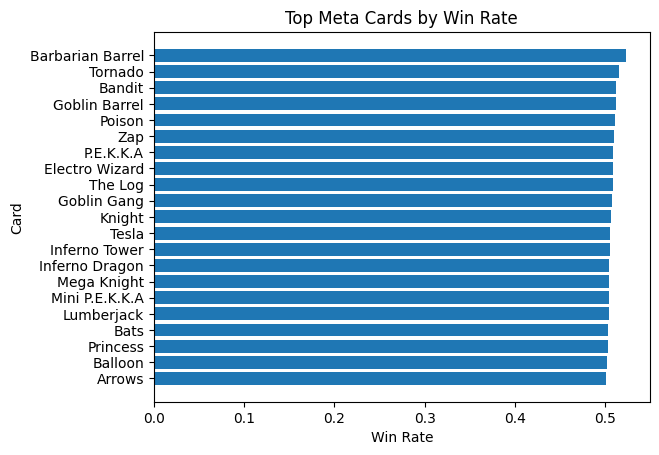

In [ ]:
top_meta = meta_cards.sort_values("win_rate", ascending=False).head(25)

plt.barh(top_meta["card"], top_meta["win_rate"])
plt.xlabel("Win Rate")
plt.ylabel("Card")
plt.title("Top Meta Cards by Win Rate")
plt.gca().invert_yaxis()
plt.show()


In [28]:
# Winner decks (label = 1)
winners = pd.DataFrame({
    "deck": df["winner_deck_names"],
    "label": 1
})

# Loser decks (label = 0)
losers = pd.DataFrame({
    "deck": df["loser_deck_names"],
    "label": 0
})

# Combine into one dataset
matches = pd.concat([winners, losers], ignore_index=True)

In [29]:
# Join cards into strings for encoding
matches["deck_str"] = matches["deck"].apply(lambda x: " ".join(x))

vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform(matches["deck_str"])
y = matches["label"]


/Users/ryanvu/Documents/datathon-2025/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [37]:
#training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.5224511705498751
AUC: 0.5224569075267271


In [35]:
#inspect model coefficients
card_names = vectorizer.get_feature_names_out()
importance = model.coef_[0]

card_influence = pd.DataFrame({
    "card": card_names,
    "influence": importance
}).sort_values("influence", ascending=False)

In [36]:
#print predicted meta cards
meta_cards = card_influence.head(15)
print(meta_cards)

          card  influence
20   collector   0.208836
87    snowball   0.097233
14      bowler   0.092851
7    barbarian   0.088676
85    skeleton   0.087224
12        bomb   0.071955
89       spear   0.070492
73       night   0.069748
102        zap   0.066109
21        dark   0.061518
27     electro   0.057296
18        cart   0.053421
80     rascals   0.053170
95     tornado   0.050667
97    valkyrie   0.045601


In [38]:
# Differences between winner and loser stats
df["elixir_diff"] = df["winner.elixir.average"] - df["loser.elixir.average"]
df["level_diff"] = df["winner.totalcard.level"] - df["loser.totalcard.level"]
df["troop_diff"] = df["winner.troop.count"] - df["loser.troop.count"]
df["spell_diff"] = df["winner.spell.count"].astype(float) - df["loser.spell.count"].astype(float)
df["structure_diff"] = df["winner.structure.count"] - df["loser.structure.count"]

# Optional contextual features
df["trophy_diff"] = df["winner.startingTrophies"] - df["loser.startingTrophies"]
df["arena_id"] = df["arena.id"]
df["mode_id"] = df["gameMode.id"]

In [39]:
# For winners
winners = pd.DataFrame({
    "deck": df["winner_deck_names"],
    "label": 1,
    "elixir": df["winner.elixir.average"],
    "level": df["winner.totalcard.level"],
    "troop": df["winner.troop.count"],
    "spell": df["winner.spell.count"].astype(float),
    "structure": df["winner.structure.count"],
    "arena": df["arena.id"],
    "mode": df["gameMode.id"]
})

# For losers
losers = pd.DataFrame({
    "deck": df["loser_deck_names"],
    "label": 0,
    "elixir": df["loser.elixir.average"],
    "level": df["loser.totalcard.level"],
    "troop": df["loser.troop.count"],
    "spell": df["loser.spell.count"].astype(float),
    "structure": df["loser.structure.count"],
    "arena": df["arena.id"],
    "mode": df["gameMode.id"]
})

# Combine
matches = pd.concat([winners, losers], ignore_index=True)


In [40]:
matches["deck_str"] = matches["deck"].apply(lambda x: " ".join(x))
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X_cards = vectorizer.fit_transform(matches["deck_str"])

/Users/ryanvu/Documents/datathon-2025/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: 